In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

In [2]:
df=pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df=df.iloc[:,1:-2] # dropping the first column and the last 2 columns 
df.sample(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9454,Existing Customer,60,F,1,Uneducated,Single,Less than $40K,Blue,47,1,3,2,4905.0,2413,2492.0,0.853,15478,109,0.730,0.492
8877,Existing Customer,45,M,2,Unknown,Married,$40K - $60K,Blue,27,2,2,3,5800.0,1434,4366.0,0.715,8202,89,0.679,0.247
9596,Existing Customer,48,F,4,Uneducated,Married,Unknown,Blue,36,2,6,1,7469.0,1216,6253.0,0.771,13614,104,0.600,0.163


In [4]:
df.dtypes


Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [5]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [6]:
x=df.drop("Attrition_Flag",axis=1)
y=df.Attrition_Flag


# spliting numerical from object columns
x_num =x[x.select_dtypes(['int64',"float64"]).columns] 
x_obj =pd.get_dummies(x[x.select_dtypes(['object']).columns],drop_first=True)



In [7]:
# scaling numericals
scaler = MinMaxScaler()
scaler.fit(x_num)
x_scaled = pd.DataFrame(scaler.transform(x_num),columns=x_num.columns,index=x_num.index)



In [8]:
# label encoding
x_dum=pd.get_dummies(x[x.select_dtypes(['object']).columns],drop_first=True)
x_dum.sample(9)

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
8430,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10059,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2768,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2931,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8725,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2985,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
4632,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
8684,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1572,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1


In [9]:
# concat labled and scaled
x_prep=pd.concat([x_scaled, x_dum], axis=1)

x_prep.dtypes
x_prep.sample(5)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
5923,0.510638,0.2,0.627907,0.6,0.166667,0.333333,0.026625,0.407628,0.037377,0.153371,...,1,0,0,0,0,1,0,0,0,0
3728,0.468085,0.6,0.627907,0.8,0.500000,0.666667,0.529865,0.898689,0.483876,0.174271,...,0,0,1,0,0,0,0,0,0,1
7686,0.638298,0.6,0.534884,0.4,0.500000,0.500000,0.259320,0.743743,0.235882,0.216367,...,1,0,0,0,0,0,1,0,0,0
2217,0.212766,0.8,0.279070,0.6,0.500000,0.500000,0.133253,0.688121,0.119115,0.179865,...,0,0,0,0,1,0,0,0,0,0
2473,0.212766,0.4,0.534884,1.0,0.333333,0.833333,0.201002,0.501788,0.197636,0.181042,...,1,0,0,0,0,1,0,0,0,0


In [10]:
y_dum=pd.get_dummies(y,drop_first=True)
y_dum.sample(5)

,Existing Customer
9776,0
7814,1
3370,0
3076,1
5082,1


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_prep, y_dum, test_size=0.3, random_state=109)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [13]:
#classifier = SVC(kernel = 'rbf' ,gamma='auto',C=2000,random_state=109)
#classifier = SVC(kernel = 'rbf' ,gamma=0.1,C=10,random_state=109)
#classifier = SVC(kernel = 'rbf' ,gamma=0.01,C=4000,random_state=109)
#classifier = SVC(kernel = 'rbf' ,gamma=0.01,C=5000,random_state=109)
#classifier = SVC(kernel = 'rbf',gamma=0.02,C=300)
classifier = SVC(kernel = 'rbf' ,gamma=0.01,C=6000,random_state=109)
classifier.fit(x_train ,y_train.values.ravel())
y_predict = classifier.predict(x_test)

In [14]:
con_mat =confusion_matrix(y_test,y_predict)
print(con_mat)
accuracy_score(y_test,y_predict)

[[ 328  138]
 [ 140 2433]]


0.9085225403093122

In [15]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train.values.ravel())


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [27]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV score on test set: 0.9187
Parameters that give the best results : 

 {'C': 1000, 'degree': 2, 'gamma': 0.05, 'kernel': 'poly'}


Estimator that was chosen by the search : 

 SVC(C=1000, degree=2, gamma=0.05, kernel='poly')


In [15]:
classifier = SVC(kernel = 'poly' ,gamma=0.05,C=1000,degree=2)
classifier.fit(x_train ,y_train.values.ravel())
y_predict = classifier.predict(x_test)

In [16]:
def plot_confusion_matrix(con_mat, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.viridis):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        con_mat = cm.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(con_mat)
    
    thresh = con_mat.max() / 2
    for i,j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        plt.text(j, i, con_mat[i,j],
        horizontalalignment ="center",
        color="black" if con_mat[i, j] > thresh else "white")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [17]:
con_mat =confusion_matrix(y_test,y_predict)
print(con_mat)
accuracy_score(y_test,y_predict)

[[ 291  175]
 [  72 2501]]


0.9187232642316552

Confusion matrix, without normalization
[[ 291  175]
 [  72 2501]]


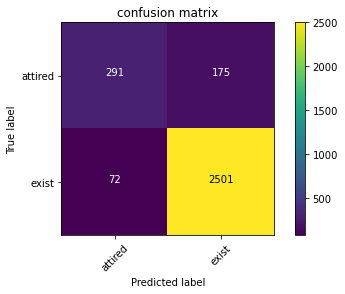

In [18]:
cm_plot_labels = ["attired",'exist']
plot_confusion_matrix(con_mat, cm_plot_labels, title="confusion matrix")

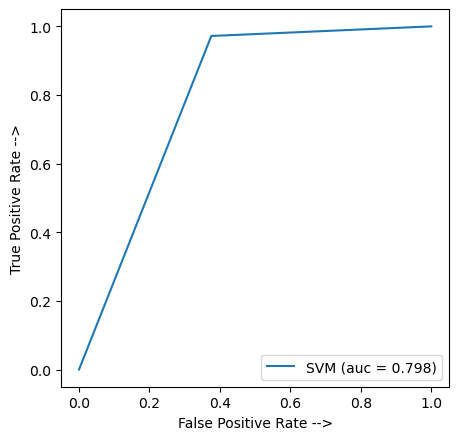

In [19]:
from sklearn.metrics import roc_curve,auc
svm_fpr,svm_tpr,threeshold=roc_curve(y_test,y_predict)
auc_svm=auc(svm_fpr,svm_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70       466
           1       0.93      0.97      0.95      2573

    accuracy                           0.92      3039
   macro avg       0.87      0.80      0.83      3039
weighted avg       0.91      0.92      0.91      3039



In [21]:
train_sizes,train_score,test_score=learning_curve(SVC(kernel = 'poly' ,gamma=0.05,C=1000,degree=2),x_prep,y_dum,cv=5,scoring="accuracy",n_jobs=-1,train_sizes=np.linspace(0.01,1,50))

In [22]:
train_mean=np.mean(train_score,axis=1)

In [23]:
test_mean=np.mean(test_score,axis=1)

In [24]:
test_mean=np.mean(test_score,axis=1)

In [25]:
train_std=np.std(train_score,axis=1)

In [26]:
test_std=np.std(test_score,axis=1)

Text(0, 0.5, 'accuracy score')

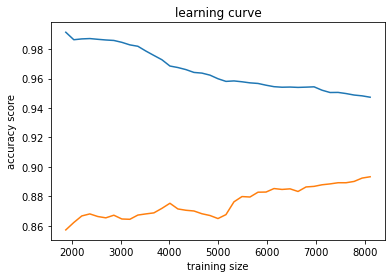

In [27]:
plt.plot(train_sizes,train_mean,label='training score')
plt.plot(train_sizes,test_mean,label='testing score')
plt.title('learning curve')
plt.xlabel('training size')
plt.ylabel('accuracy score')